In [1]:
#Import the modules we need.
%pylab inline
import datetime

from matplotlib import pyplot as plt 
import numpy as np
from types import SimpleNamespace
import json
import datetime as dt

import sys
sys.path.append("agw")
sys.path.append("agw/tid/")
from stage import StagingUnit
import music
import plotting

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib

IMPORTANT: Please make sure to cite pyDARN in publications that use plots created by pyDARN using DOI: https://zenodo.org/record/3727269. Citing information for SuperDARN data is found at https://pydarn.readthedocs.io/en/master/user/citing/


In [2]:
rad = "wal"
dates = [
    dt.datetime(2011,5,9,8),
    dt.datetime(2011,5,9,19)
]
with open("config/params.json") as f:
    conf = json.load(f, object_hook=lambda x: SimpleNamespace(**x))
su = StagingUnit(rad, dates, conf)

2023-01-19 15:43:38.912 | INFO     | stage:_fetch:126 -  Fetching data...
2023-01-19 15:43:38.912 | INFO     | stage:_fetch:135 -  Read radar file wal for ['2011.05.09T08.00', '2011.05.09T19.00']


In [3]:
dataObj     = music.musicArray(su, sTime=dates[0],eTime=dates[1],fovModel='GS')

In [4]:
dataObj.get_data_sets()

['DS000_originalFit']

In [5]:
dataObj.DS000_originalFit.printMetadata()

channel: 0
code: wal
coords: geo
cp: -503
dType: dmap
dataSetName: DS000_originalFit
eTime: 2011-05-09 19:00:00
elevation: None
fType: fitacf
gscat: 1
model: GS
name: Wallops Island
param: p_l
sTime: 2011-05-09 08:00:00
serial: 0
stid: 32


In [6]:
dataObj.DS000_originalFit.printHistory()

2023-01-19 15:43:50.281603 [DS000_originalFit] Original Fit Data


In [7]:
dataObj.active.printHistory()

2023-01-19 15:43:50.281603 [DS000_originalFit] Original Fit Data


/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/agw/plotting.py: 669: UserWarning: FixedFormatter should only be used together with FixedLocator
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).


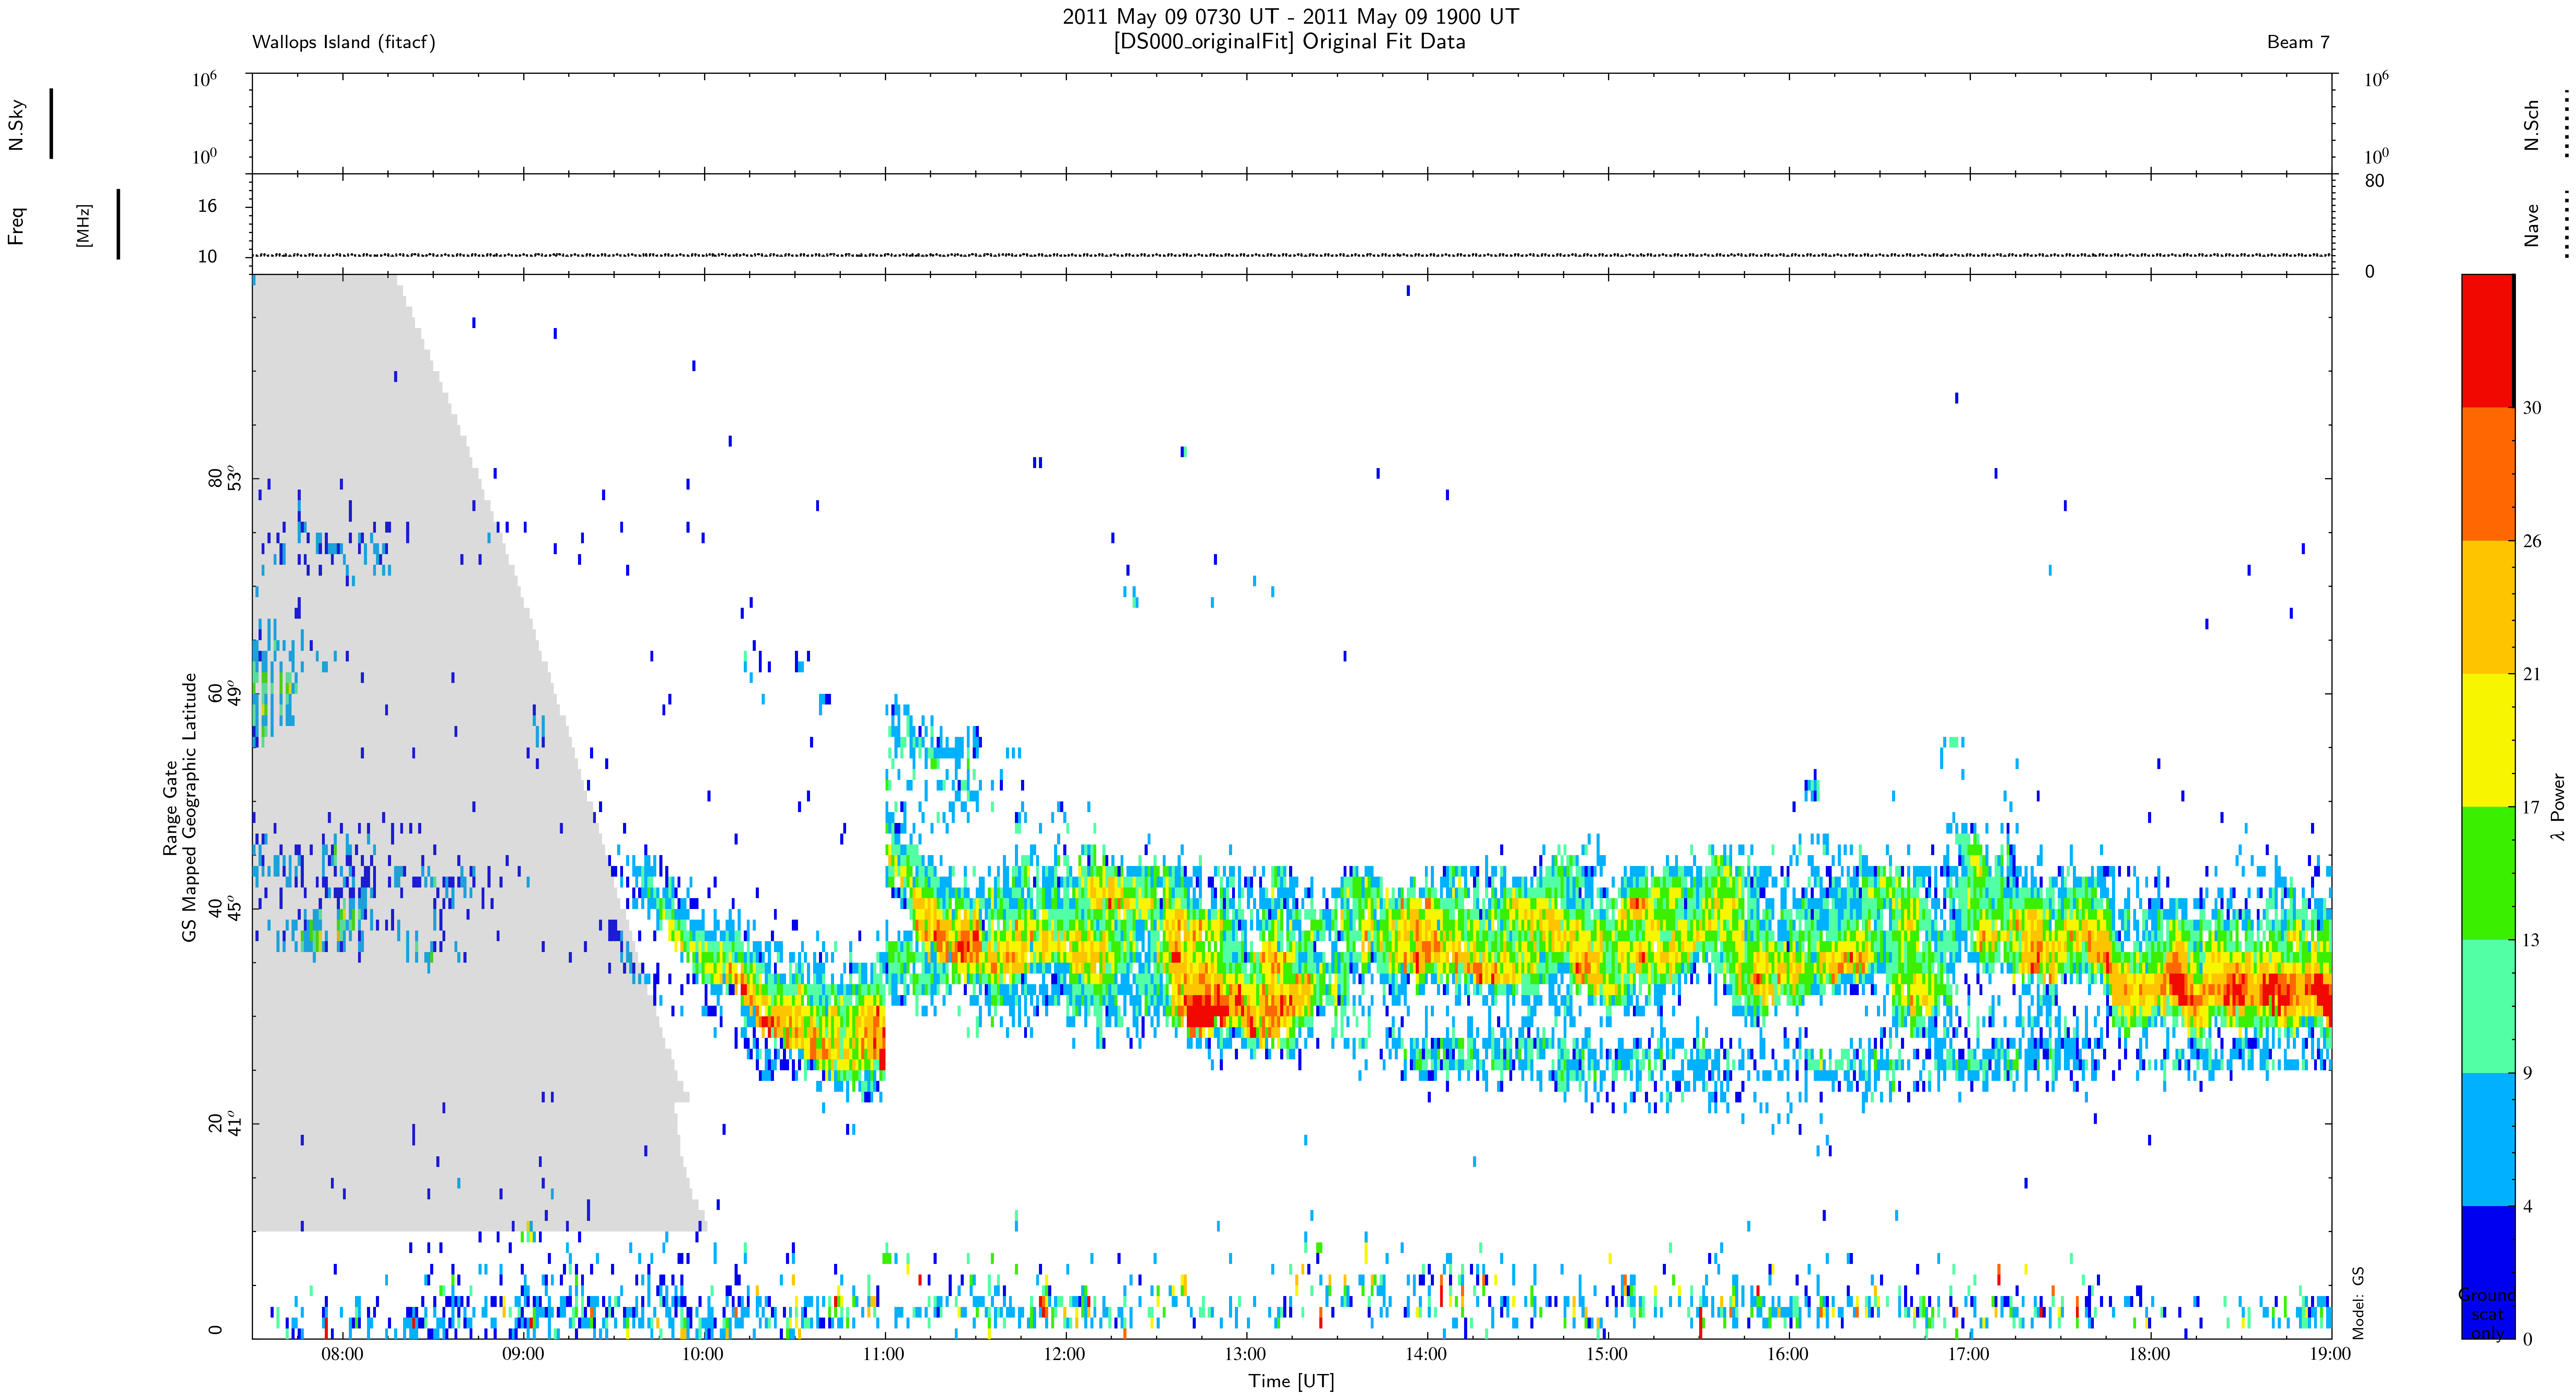

In [8]:
fig = plotting.musicRTI(dataObj)

In [9]:
# # We can also make a fan plot.
# plotTime = datetime.datetime(2011,5,9,14)
# fig = plotting.musicFan(dataObj,time=plotTime)

/home/shibaji/CodeBase/LWS_AGW_TID_Analysis/agw/plotting.py: 669: UserWarning: FixedFormatter should only be used together with FixedLocator
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).


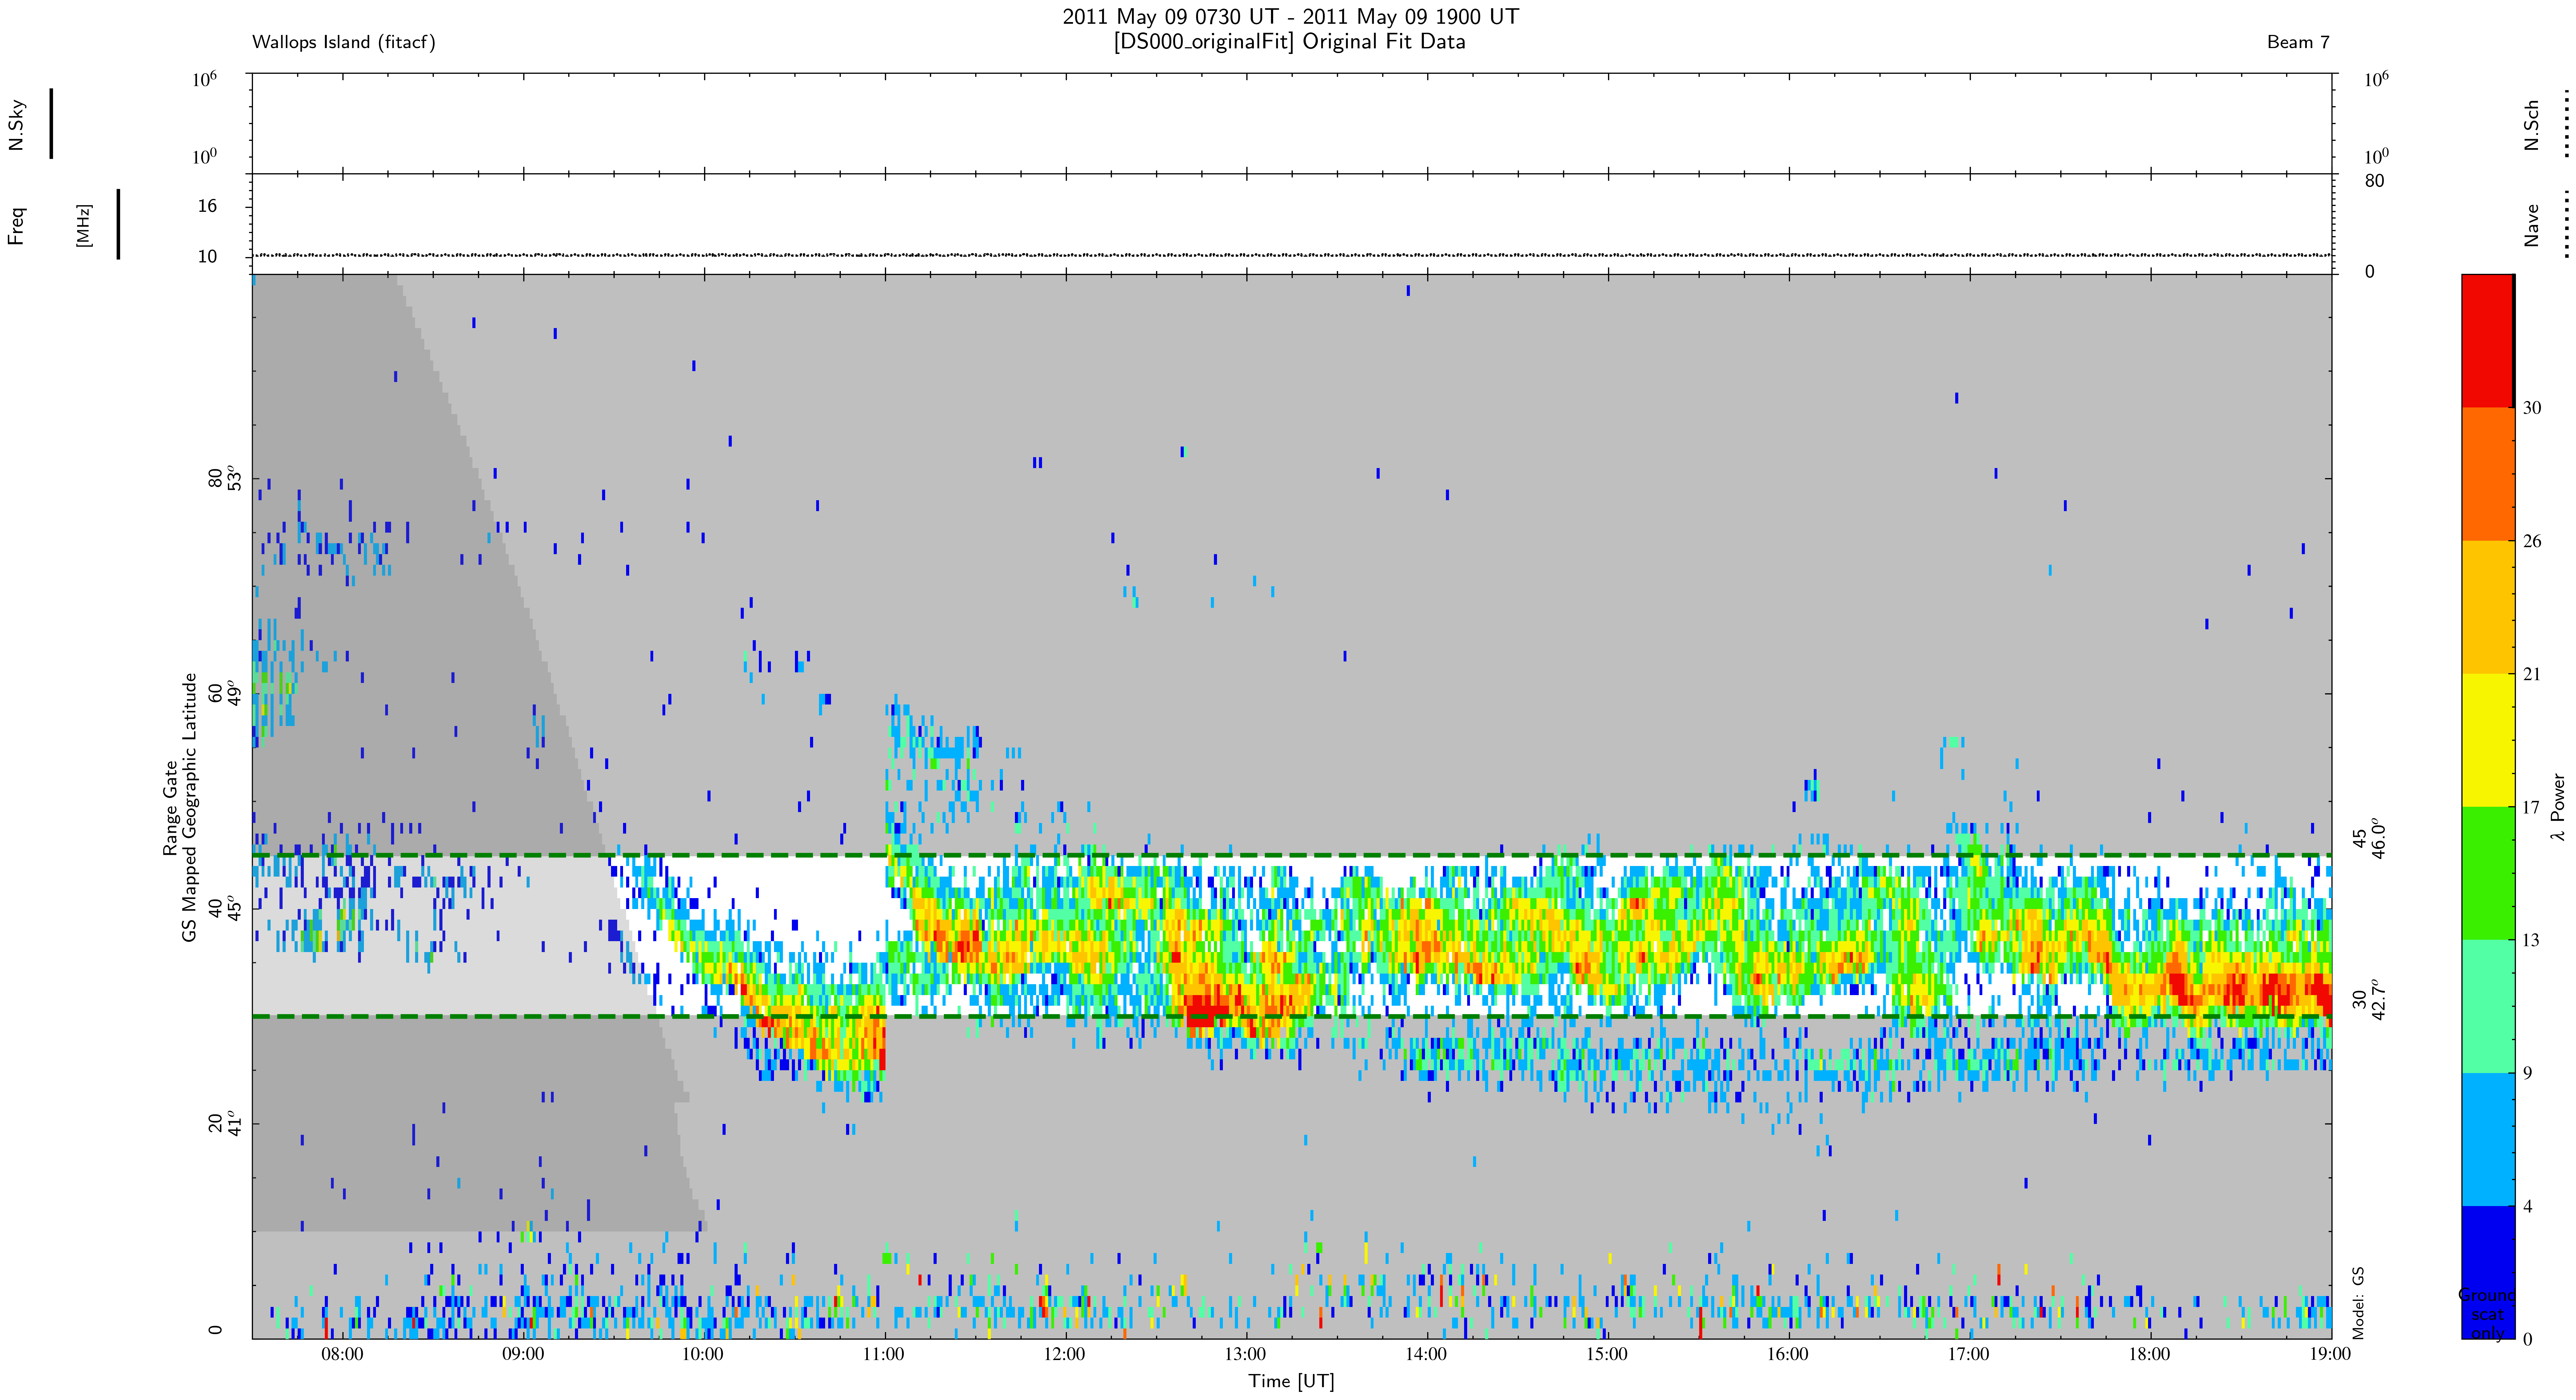

In [10]:
music.defineLimits(dataObj,gateLimits=[30,45])
fig = plotting.musicRTI(dataObj)

Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 50000 ticks ([1.0, ..., 50000.0]), which exceeds Locator.MAXTICKS (1000).


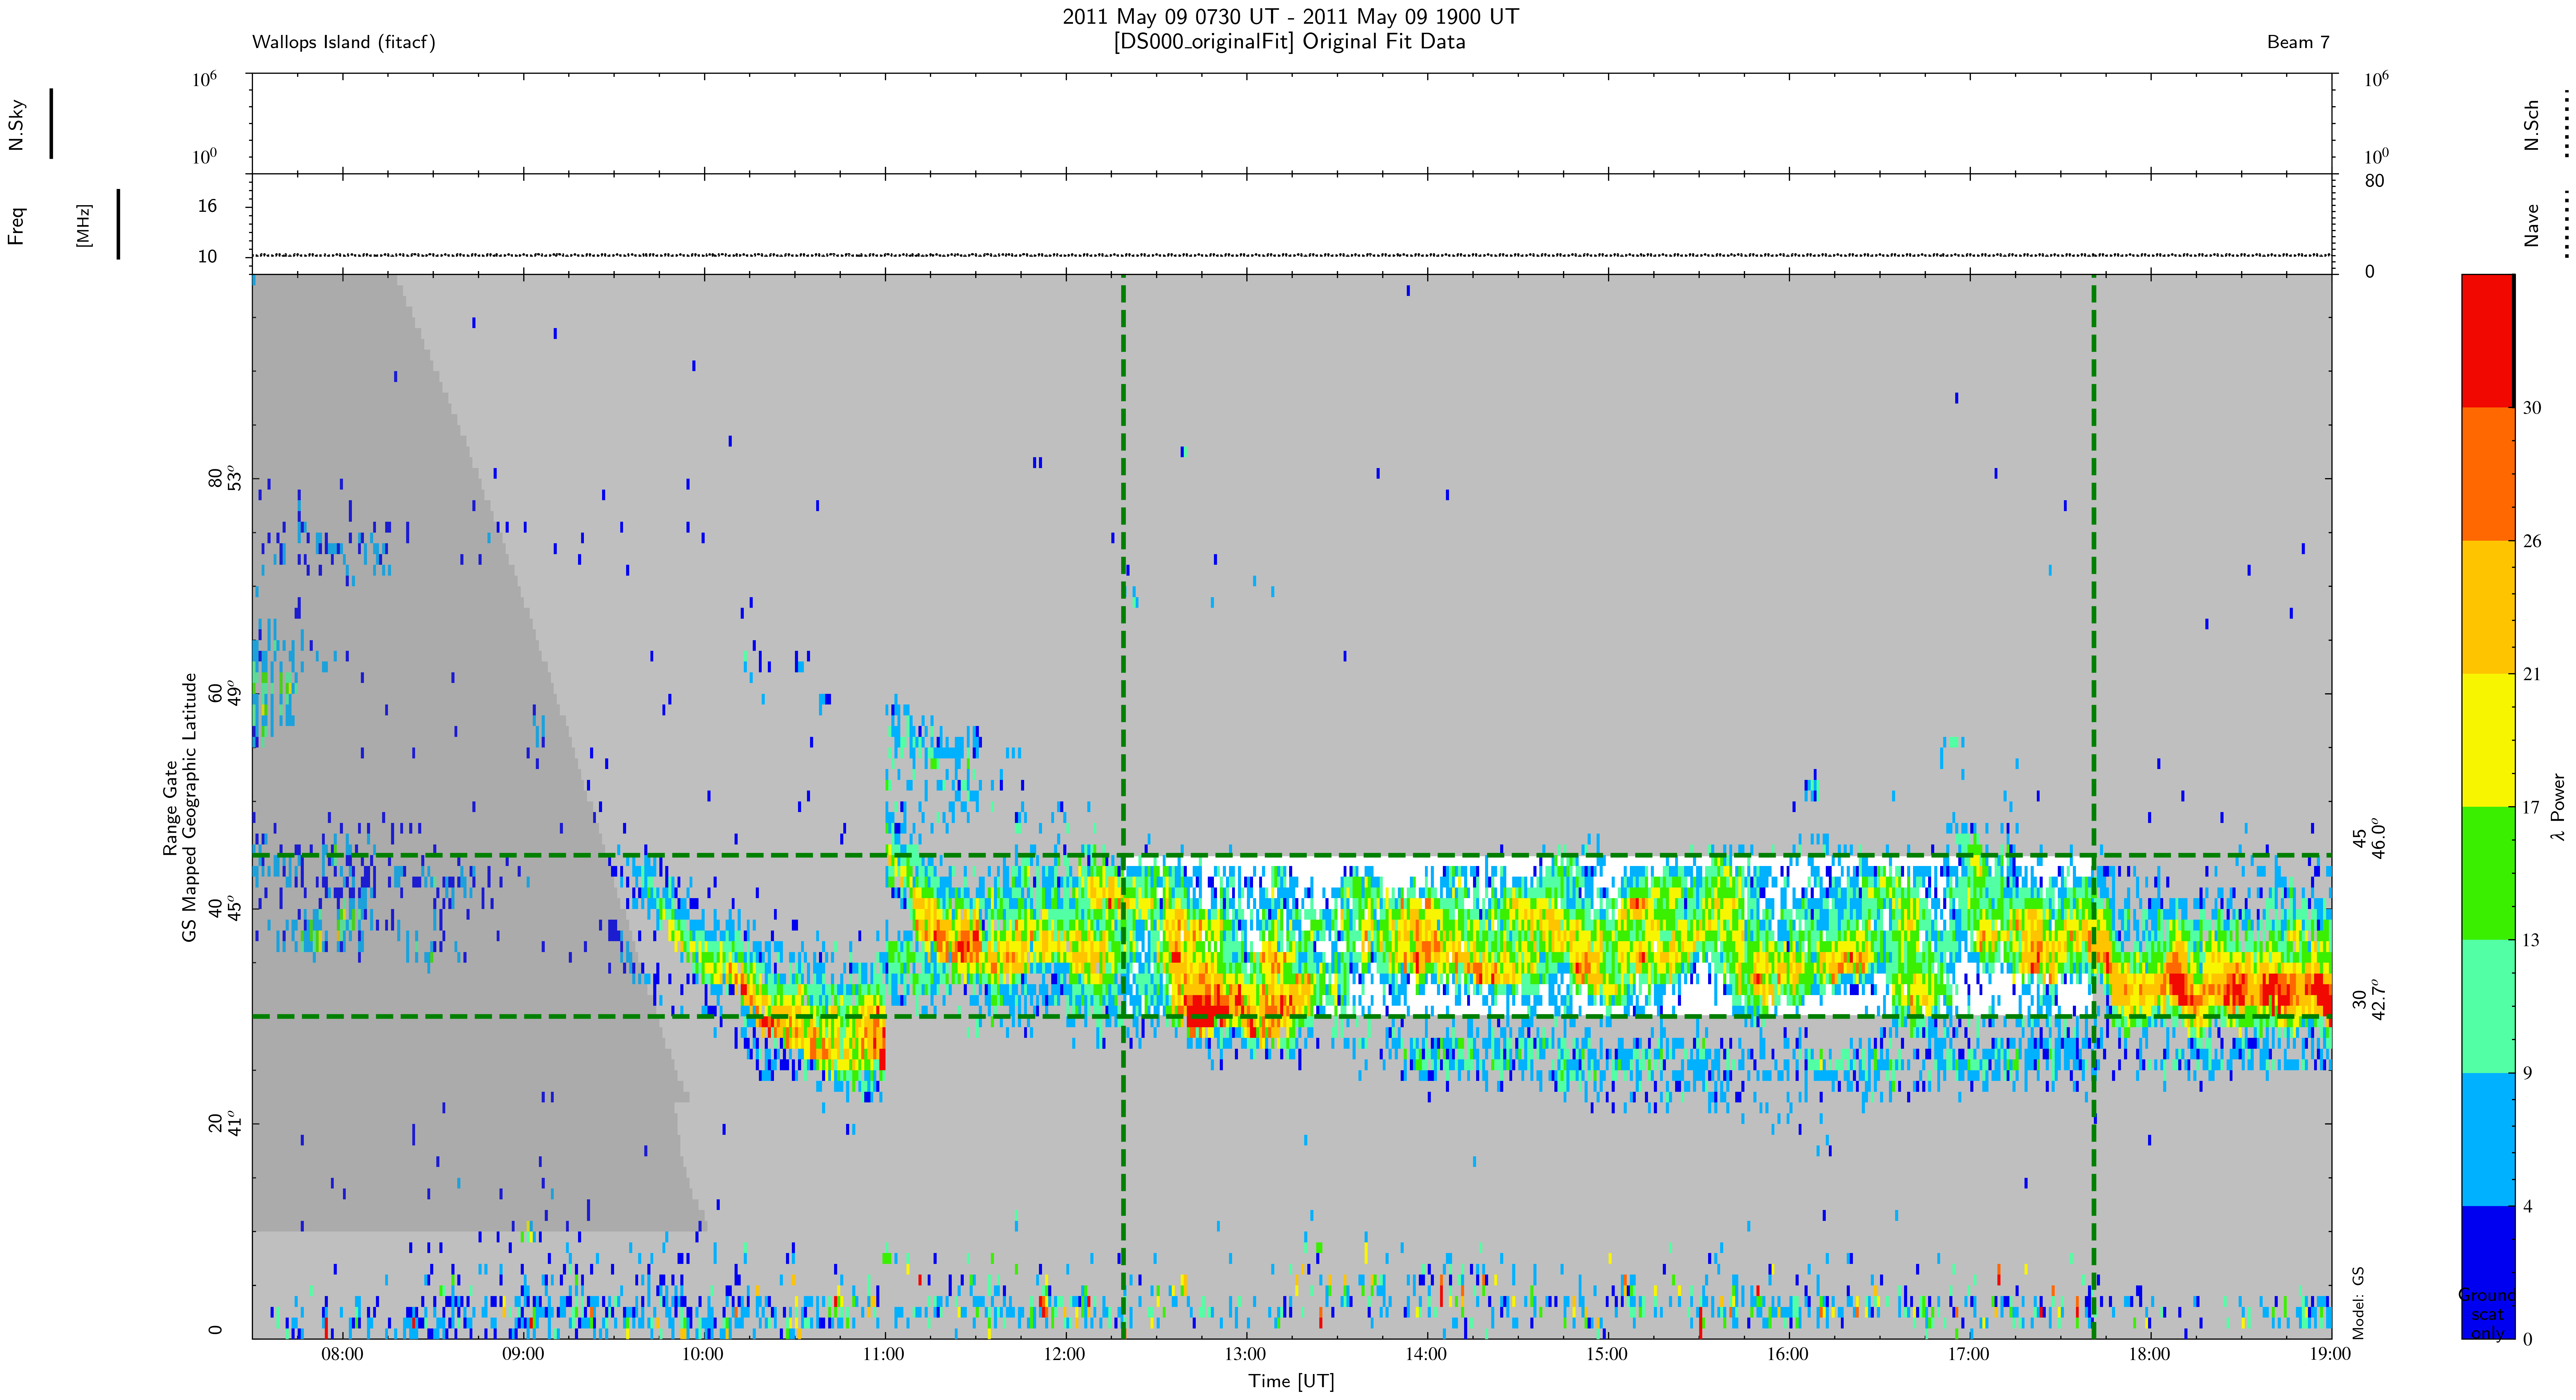

In [11]:
numtaps = 101
timeres = 120

#Let's also say that we are interested in the MSTID feature between 1400 and 1600 UT.
sTime_of_interest = datetime.datetime(2011,5,9,14)
eTime_of_interest = datetime.datetime(2011,5,9,16)

#Now calculate the new start and end times...
new_times = music.filterTimes(sTime_of_interest, eTime_of_interest, timeres, numtaps)
music.defineLimits(dataObj,timeLimits=new_times)

fig = plotting.musicRTI(dataObj)

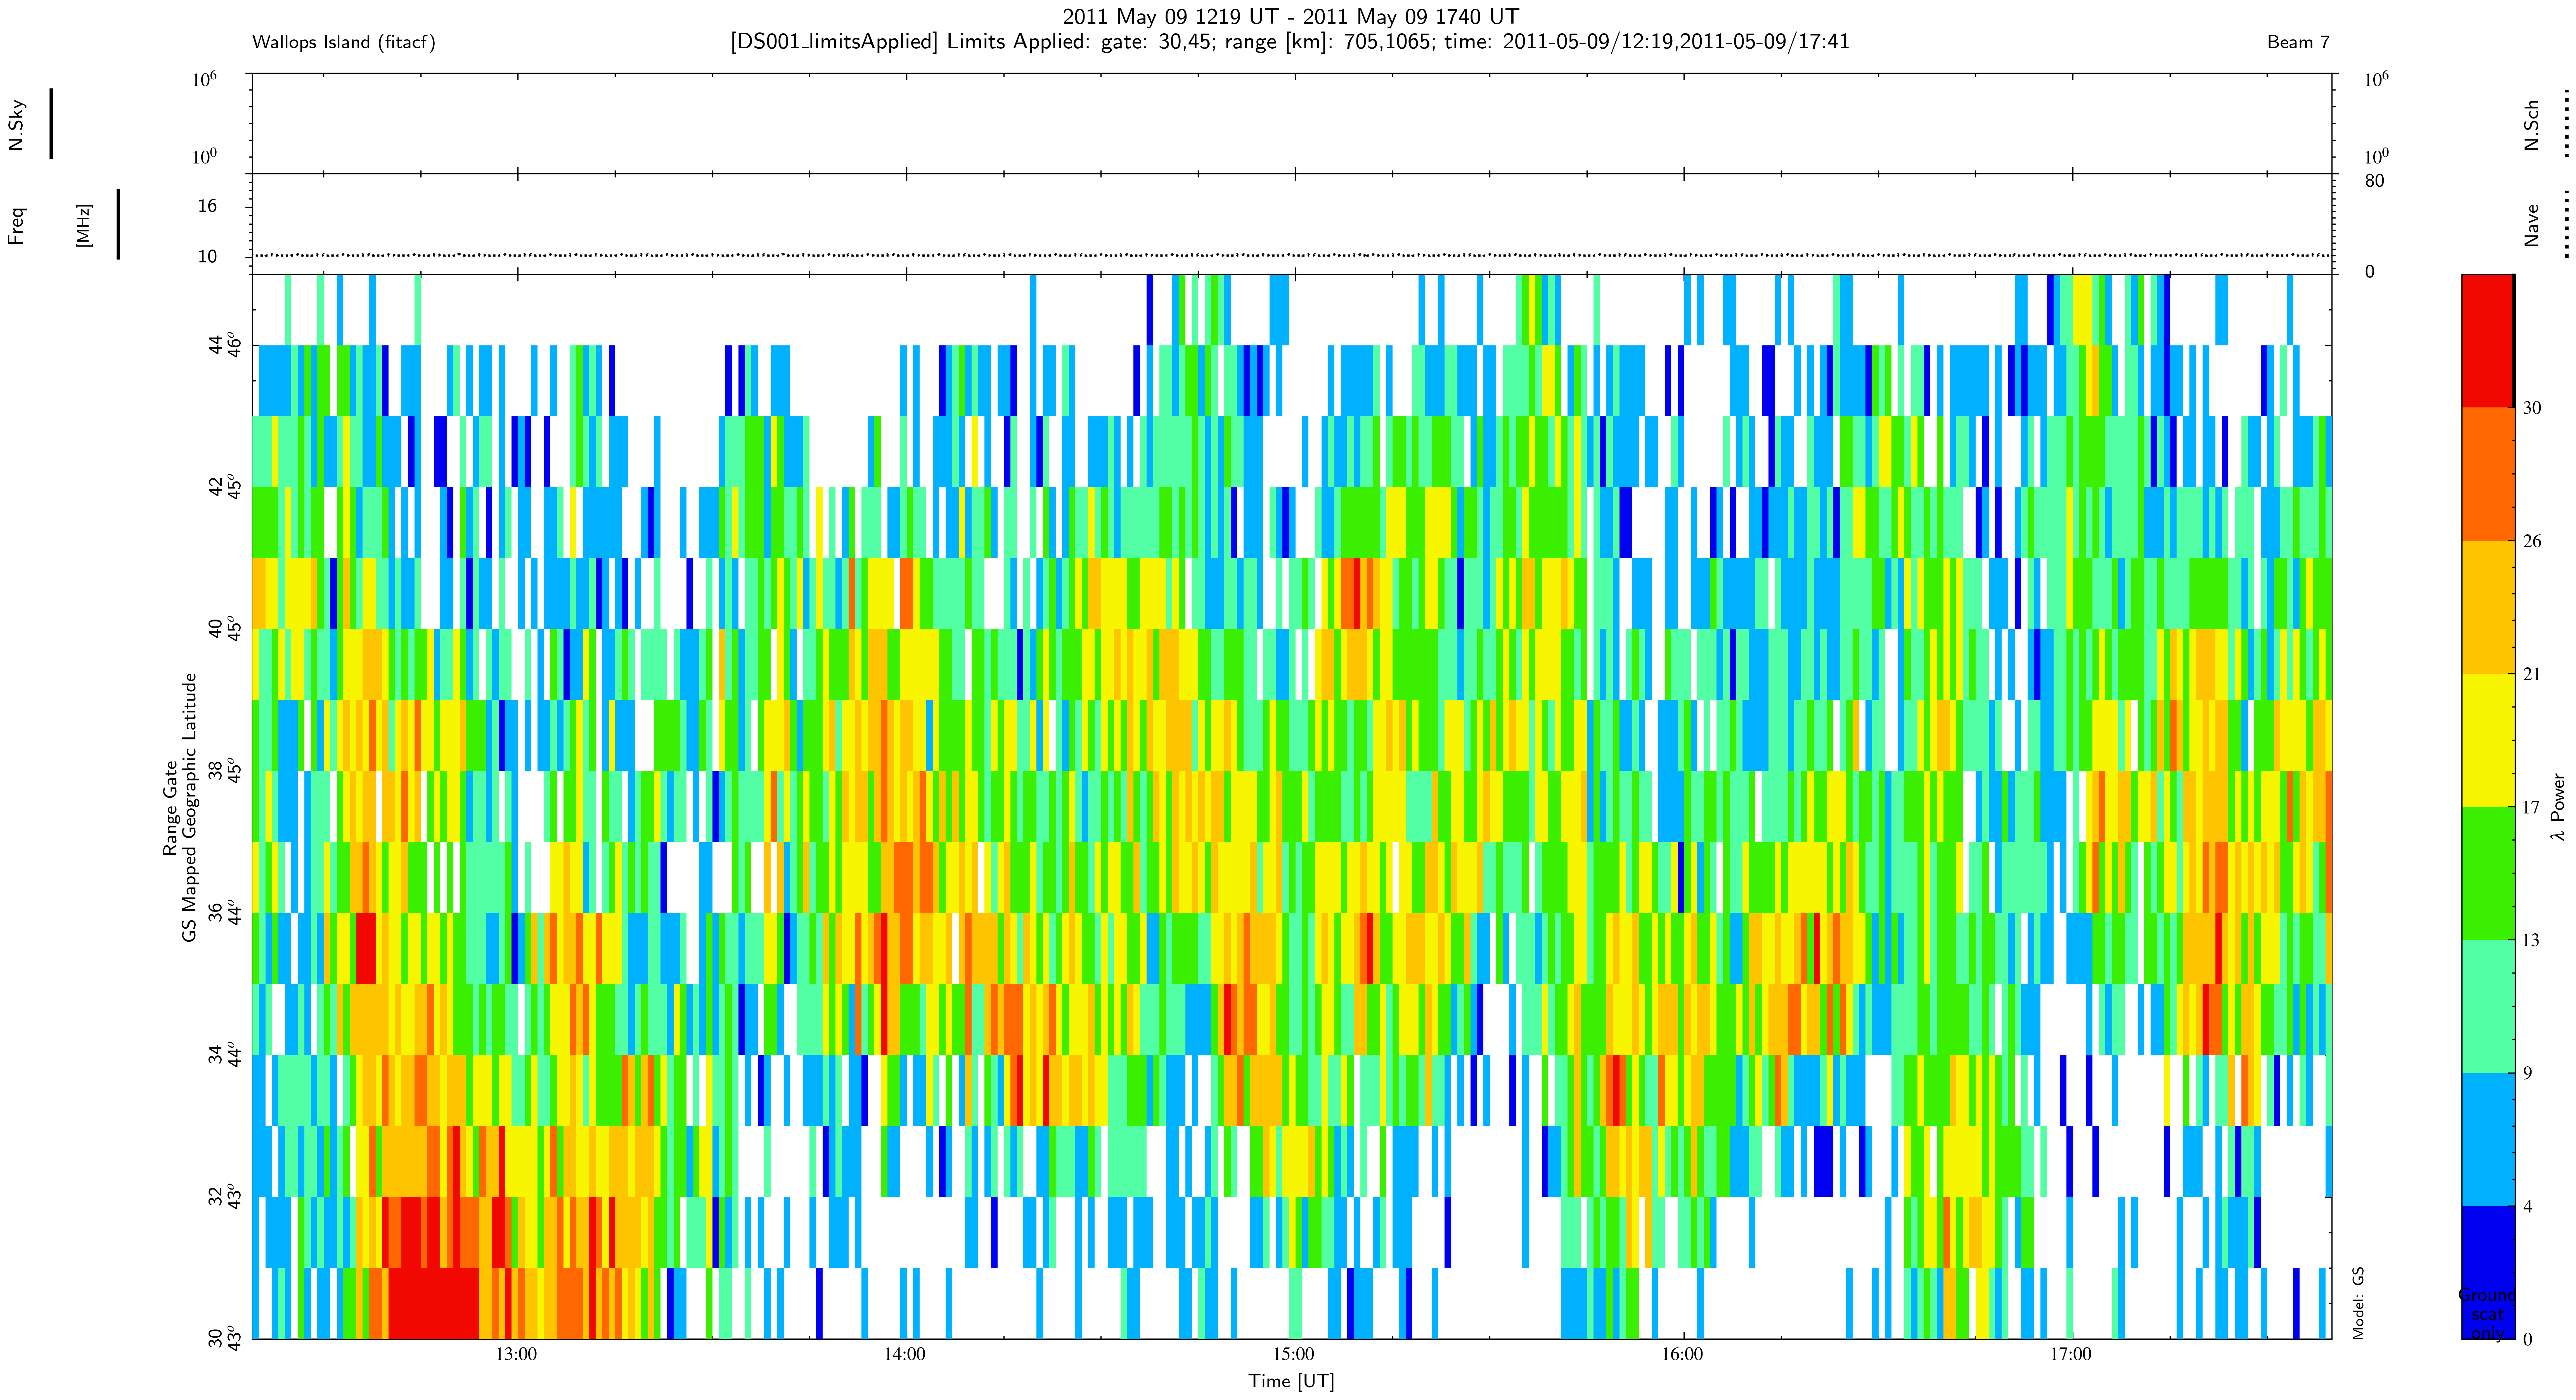

In [12]:
dataObj.active.applyLimits()
plotting.musicRTI(dataObj)

In [13]:
dataObj.get_data_sets()

['DS000_originalFit', 'DS001_limitsApplied']

In [14]:
dataObj.active.printHistory()

2023-01-19 15:43:50.281603 [DS000_originalFit] Original Fit Data
2023-01-19 15:50:03.522701 [DS001_limitsApplied] Limits Applied: gate: 30,45; range [km]: 705,1065; time: 2011-05-09/12:19,2011-05-09/17:41


In [15]:
music.beamInterpolation(dataObj)

In [16]:
music.timeInterpolation(dataObj,timeRes=timeres)
plotting.timeSeriesMultiPlot(dataObj,dataSet='timeInterpolated',dataSet2='beamInterpolated')

In [17]:
music.determineRelativePosition(dataObj)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
filt = music.filter(dataObj, numtaps=numtaps, cutoff_low=0.0003, cutoff_high=0.0012)

In [ ]:
fig = filt.plotTransferFunction(xmax=0.004)
fig = filt.plotImpulseResponse()

In [ ]:
dataObj.active.applyLimits()

In [ ]:
dataObj.active.printHistory()

In [ ]:
music.calculateFFT(dataObj)